In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as ps
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Resources/winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [3]:
#Reorganize columns

df=df[["color", "fixed acidity", "volatile acidity", "citric acid", 
       "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
       "density", "pH", "sulphates", "alcohol", "quality"]]
df

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
#rename color column

df.rename(columns={'color':'wine_type'},inplace=True)
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#Explore the data

print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (6497, 13)


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
len(df.quality.unique())

7

In [8]:
Sum = df.isnull().sum()
Percentage = ( df.isnull().sum()/df.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
wine_type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


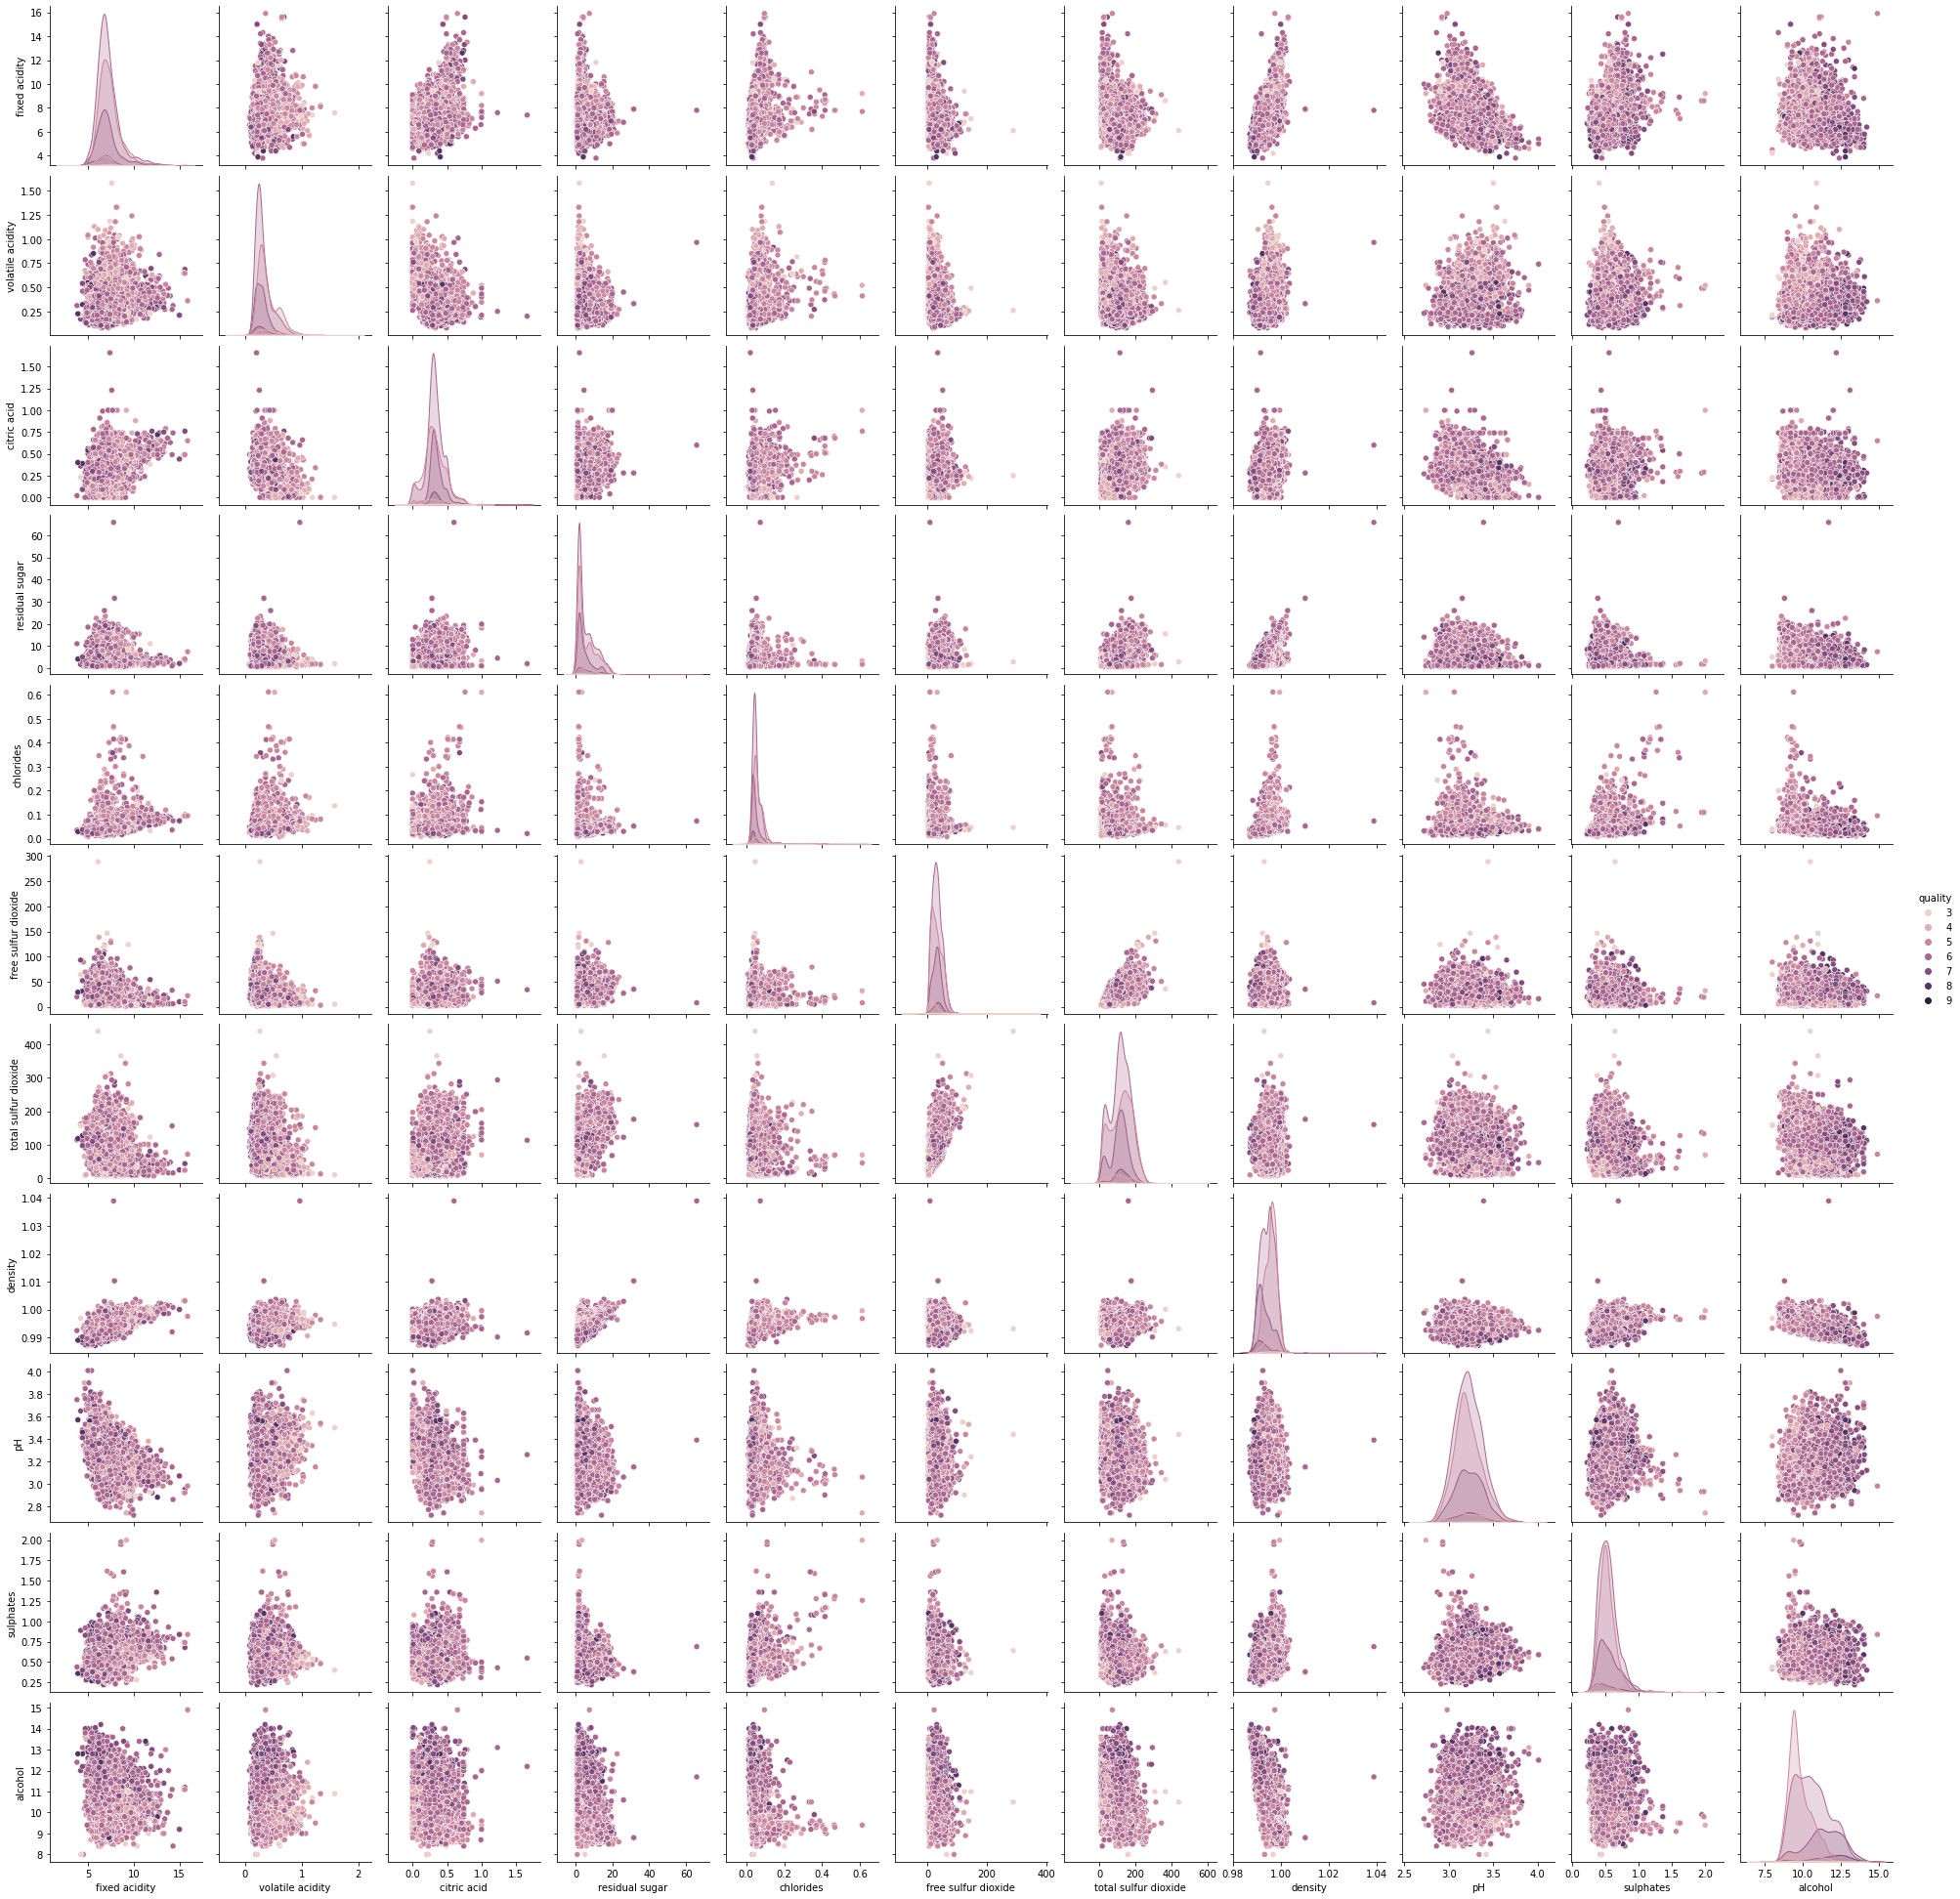

In [9]:
sns.pairplot(df, hue="quality")
plt.savefig('../static/images/pairplot.png')

Text(0, 0.5, 'correlation')

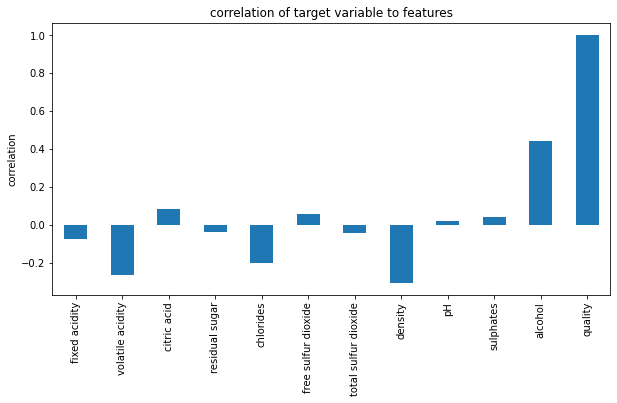

In [10]:
#Correlation of target feature to variables
plt.figure(figsize=(10,5))
ax = df.corr()['quality'].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

ValueError: could not convert string to float: 'wine_type'

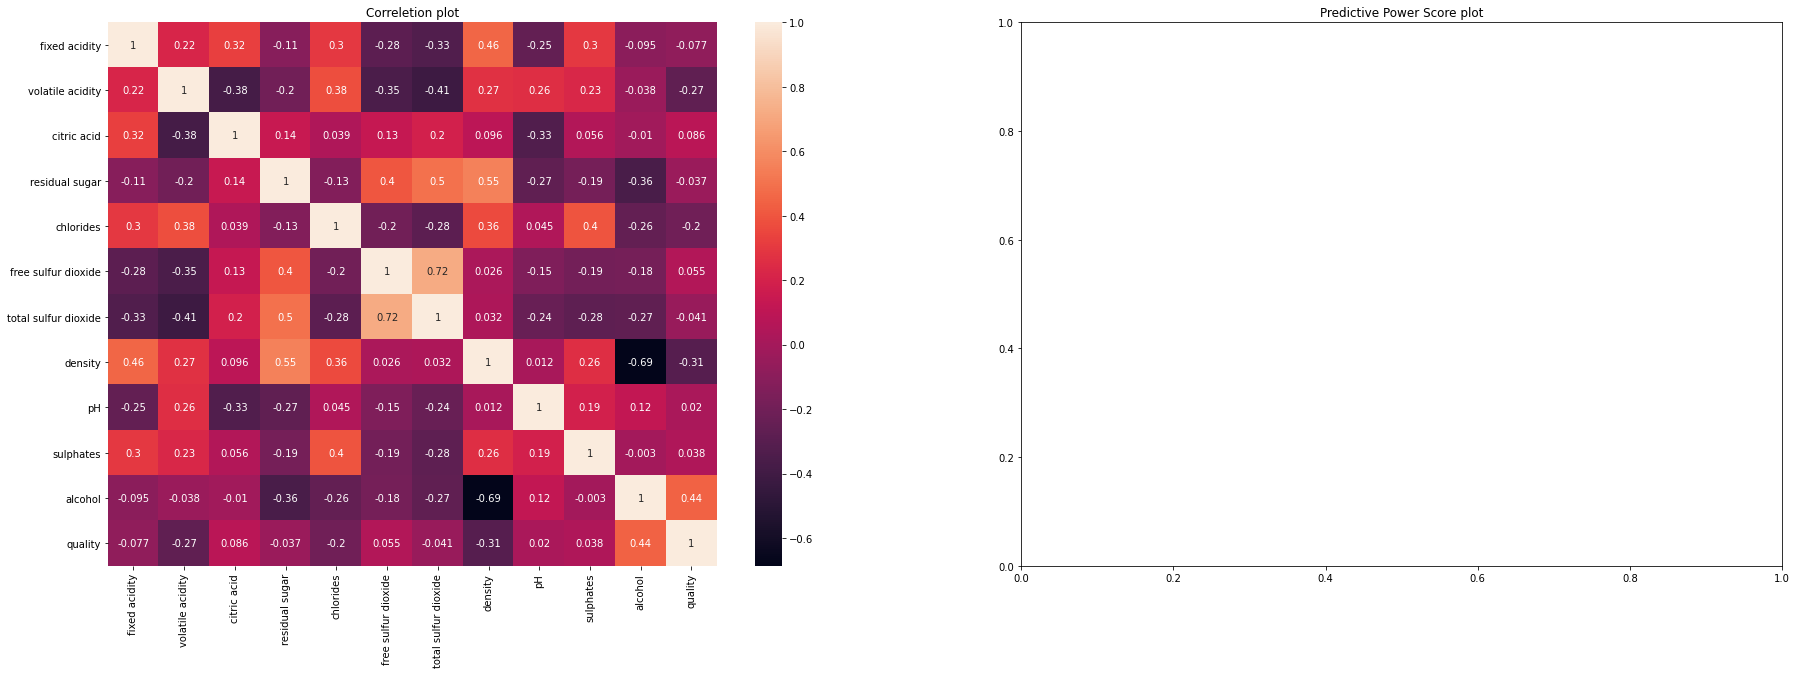

In [11]:
#Heatmaps
plt.figure(figsize=(30,10));plt.subplot(121,title = 'Correletion plot')
sns.heatmap(df.corr(),annot=True);plt.subplot(122,title='Predictive Power Score plot')
sns.heatmap(ps.matrix(df),annot=True)

In [12]:
#Make the wine color a number so it can be used in ml
df.wine_type = df.wine_type.map({'white':0, 'red':1})
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


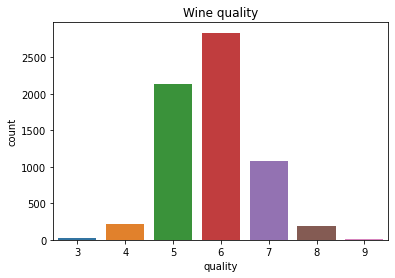

In [13]:
sns.countplot(data=df, x="quality").set_title("Wine quality")
plt.savefig('../static/images/qualitycount.png')

### Run the Machine Learning

In [14]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
X = df.drop(columns=['quality'],axis=1) 
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [16]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [17]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.48
Accuracy in Test  set   : 0.48


In [18]:
df_bins3= df.copy()

In [19]:
#Put the qualities in bins
bins = [0,4,7,10]

labels = [0,1,2] # 'low'=0,'average'=1, 'high'=2

df_bins3['quality_range']= pd.cut(x=df_bins3['quality'], bins=bins, labels=labels)

#df_bins3.type = df_bins3.type.map({'white':0, 'red':1})

print(df_bins3[['quality_range','quality']].head(5))

  quality_range  quality
0             1        5
1             1        5
2             1        5
3             1        6
4             1        5


Text(0.5, 1.0, 'Wine quality')

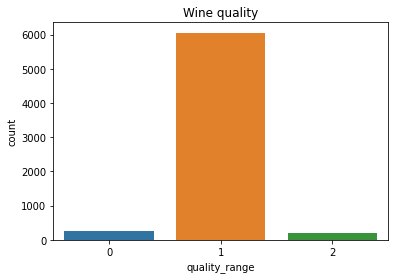

In [20]:
sns.countplot(data=df_bins3, x="quality_range").set_title("Wine quality")

In [21]:
df_bins3 = df_bins3.drop(columns=['quality'],axis=1).copy()

In [22]:
X = df_bins3.drop(columns=['quality_range'],axis=1) 
y = df_bins3.quality_range

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [23]:
X.columns

Index(['wine_type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [24]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [25]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('One-vs-rest', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

One-vs-rest
-----------------------------------
Accuracy Score of Train Model : 0.93
Accuracy Score of Test  Model : 0.92


In [26]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [27]:
import ipywidgets

In [28]:
AutoML.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.9432362848893167
Generation 2 - Current best internal CV score: 0.9432362848893167
Generation 3 - Current best internal CV score: 0.9432362848893167
Generation 4 - Current best internal CV score: 0.9443914266676536
Generation 5 - Current best internal CV score: 0.9443914266676536
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=2, n_estimators=100)


TPOTClassifier(generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000001C567385A88>,
               verbosity=2)

In [29]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [30]:
AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)


Generation 1 - Current best internal CV score: 0.9322765440871675
Generation 2 - Current best internal CV score: 0.9324305086753124
Generation 3 - Current best internal CV score: 0.9324305086753124
Generation 4 - Current best internal CV score: 0.9324305086753124
Generation 5 - Current best internal CV score: 0.9324305086753124
Best pipeline: LinearSVC(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), C=1.0, dual=False, loss=squared_hinge, penalty=l1, tol=0.01)


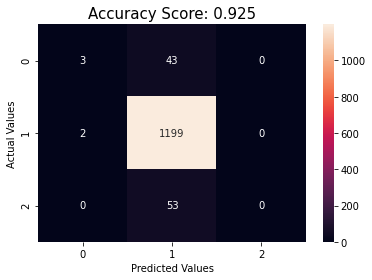

In [31]:
from sklearn.metrics import confusion_matrix as cm

predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [32]:
AutoML.export('pipeline.py')